# Подготовка данных и окружения.

In [1]:
# %pip install kaggle
# %pip install kagglehub

# import kaggle
# kaggle.api.authenticate()
# kaggle.api.dataset_download_file(dataset='maharshipandya/-spotify-tracks-dataset')

# import kagglehub
# kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

In [2]:
%pip install numpy pandas matplotlib seaborn scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA и Research-анализ

### Общий обзор данных

In [4]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#### Описание полей датасета Spotify

| Поле                | Описание |
|---------------------|----------|
| **track_id**        | ID трека в Spotify |
| **artists**         | Имена исполнителей трека. Если исполнителей несколько — разделены точкой с запятой (`;`) |
| **album_name**      | Название альбома, в котором находится трек |
| **track_name**      | Название трека |
| **popularity**      | Популярность трека (0–100). 100 — максимальная популярность. Рассчитывается алгоритмом в основном по количеству и актуальности прослушиваний. Треки, которые сейчас активно слушают, имеют более высокую популярность. Одинаковые треки (сингл и альбомная версия) оцениваются отдельно. Популярность артиста и альбома выводится математически из популярности треков |
| **duration_ms**     | Длительность трека в миллисекундах |
| **explicit**        | Присутствует ли нецензурная лексика (`true` — да, `false` — нет или неизвестно) |
| **danceability**    | Танцевальность (0.0 – 1.0). Насколько трек подходит для танцев (учитываются темп, стабильность ритма, сила бита и регулярность) |
| **energy**          | Энергичность (0.0 – 1.0). Отражает интенсивность и активность. Энергичные треки обычно быстрые, громкие и «шумные» (например, дэт-метал — высокая, прелюдия Баха — низкая) |
| **key**             | Тональность трека. Целые числа по стандартной нотации Pitch Class:<br>0 = До (C), 1 = До♯/Ре♭, 2 = Ре (D), …<br>Если не определена — `-1` |
| **loudness**        | Общая громкость трека в децибелах (дБ) |
| **mode**            | Лад: мажор = `1`, минор = `0` |
| **speechiness**     | Речевая насыщенность (0.0 – 1.0):<br>• >0.66 — почти наверняка только речь (ток-шоу, аудиокниги)<br>• 0.33–0.66 — смесь музыки и речи (в т.ч. рэп)<br>• <0.33 — преимущественно музыка |
| **acousticness**    | Уверенность в акустичности трека (0.0 – 1.0). `1.0` — очень высокая вероятность акустического звучания |
| **instrumentalness**| Вероятность отсутствия вокала (0.0 – 1.0). Звуки типа «ooh» и «aah» считаются инструментальными |
| **liveness**        | Вероятность живой записи с аудиторией (0.0 – 1.0). Значения >0.8 с высокой вероятностью указывают на концертную запись |
| **valence**         | Музыкальная позитивность (0.0 – 1.0). Высокие значения — радостные/весёлые/эйфоричные треки, низкие — грустные/злые/депрессивные |
| **tempo**           | Темп трека в ударах в минуту (BPM) |
| **time_signature**  | Оценочный музыкальный размер (количество долей в такте). Значения 3–7 соответствуют 3/4, 4/4, … 7/4 |
| **track_genre**     | Жанр трека |

#### Анализ пропусков

In [5]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Пропусков в наших данных нет, радуемся и переходим к следующему пункту.

#### Исключение неинформативных данных

После получения данных мы можем сразу заметить колонку "**unnamed: 0**", в целом её значения дублируют id столбцов - лишняя нагрузка, можно убрать уже сейчас.  
Так-же сразу можно убрать поля **track_id, artists, album_name, track_name** - исходя из логики, что эти поля неудобно использовать и относить к категориальным, по причине большого разброса значений.

In [6]:
data = data.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Анализ данных

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
 15  track_genre       114000 non-null  object 
dtypes: bool(1), float64(

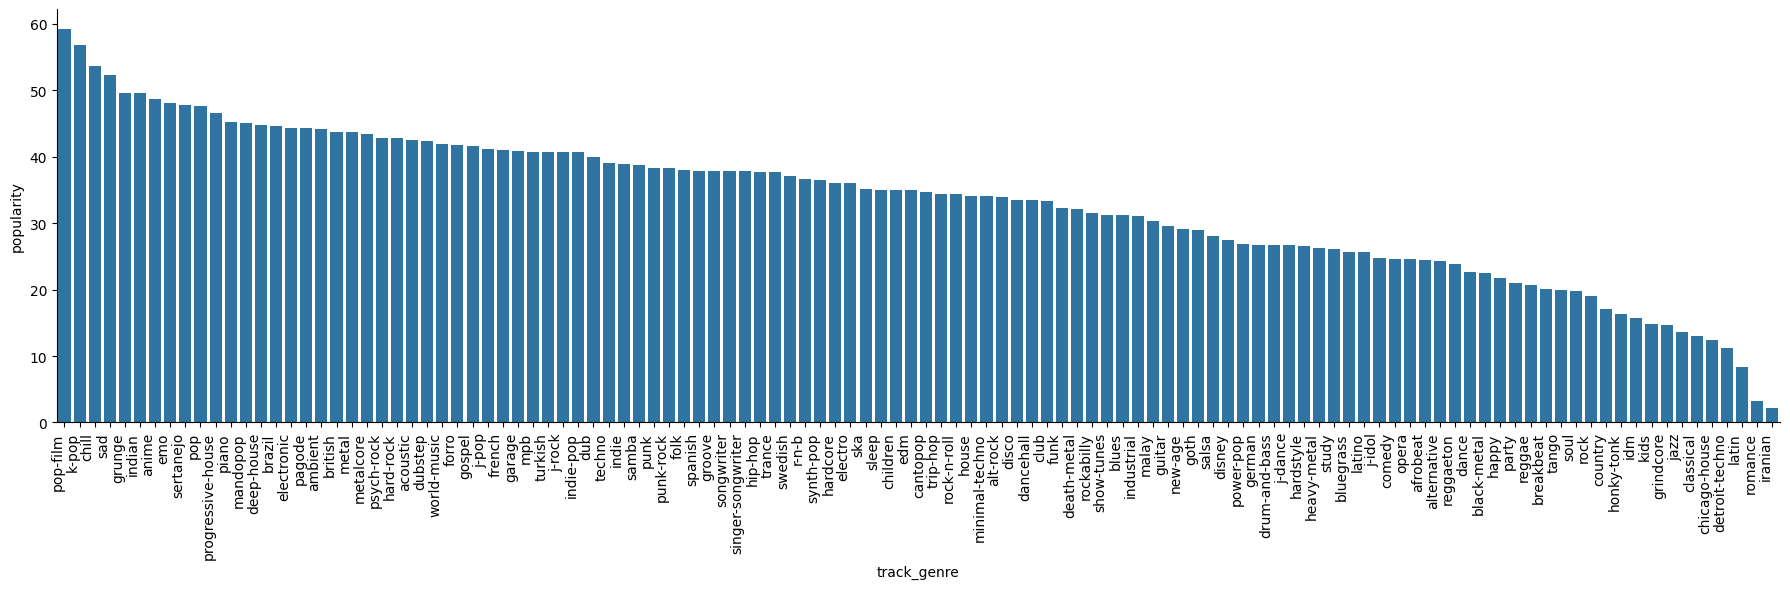

In [49]:
popularity_genres = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

sns.catplot(popularity_genres, kind="bar", height=6, aspect=3)

plt.xticks(rotation=90, ha='right')    
plt.tight_layout()                     
plt.show()

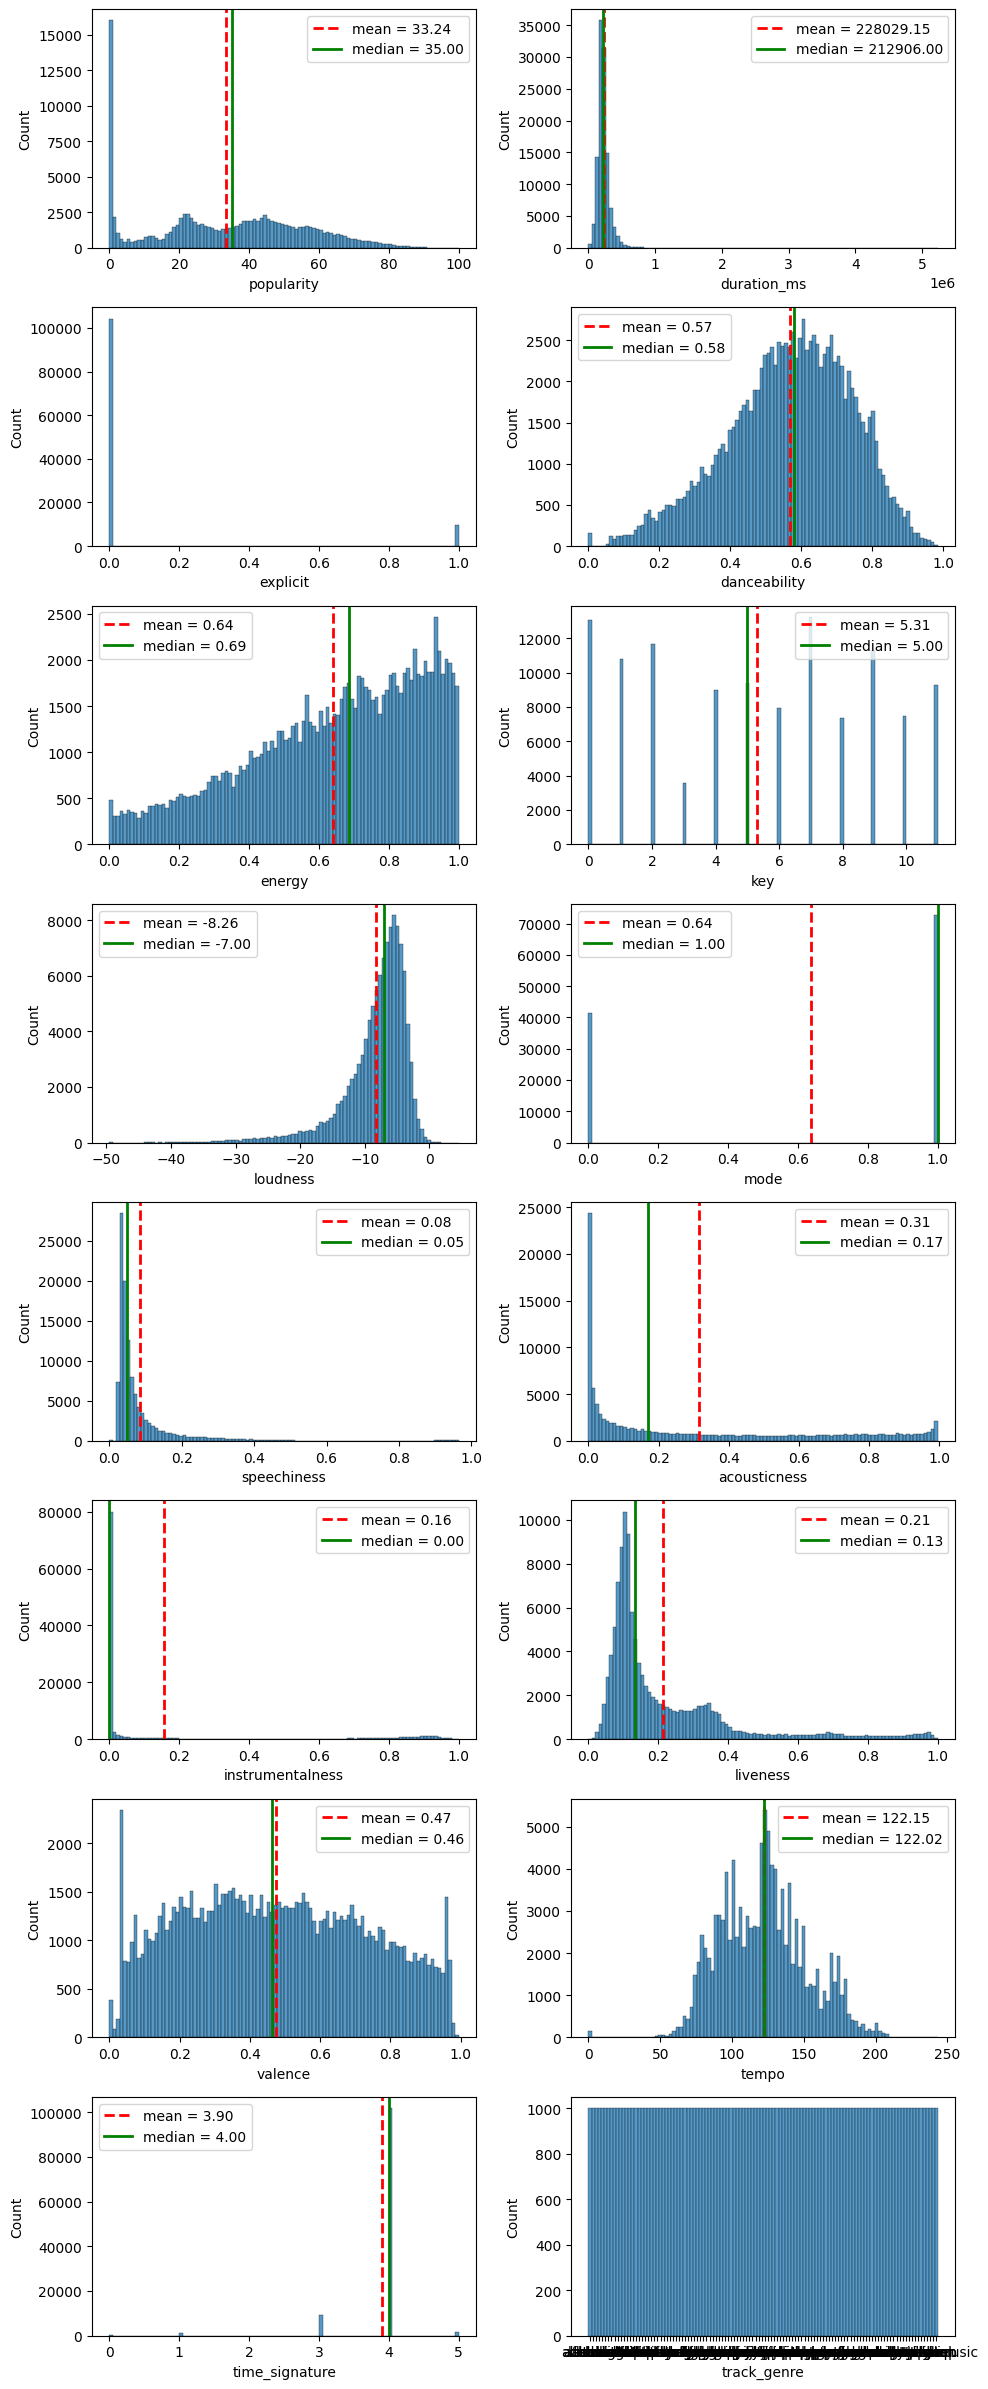

In [12]:
cols = data.columns.tolist()
n = len(cols)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
axs = axs.flatten()

for i, col in enumerate(cols):
    ax = axs[i]
    sns.histplot(data[col], bins=100, ax=ax, edgecolor='k')
    if data[col].dtype not in ['object', 'bool']:
        mean_val = data[col].mean()
        median_val = data[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'mean = {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'median = {median_val:.2f}')
        ax.legend()

for j in range(n, len(axs)):
    axs[j].axis('off')

fig.tight_layout()
plt.show()

#### Разделение данных на ***категориальные*** и ***количественные*** признаки.

Считаю необходимым разделить данный датасет на Количественные и Категориальные признаки.  
Делать мы это будем с помощью анализа количества уникальных значений в каждом столбце.

In [ ]:
data.nunique()

popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

In [ ]:
num_data = data.drop(columns=['popularity', 'explicit', 'key', 'mode', 'time_signature', 'track_genre'])
num_data.head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


In [ ]:
cat_data = data.loc[:, ['explicit', 'key', 'mode', 'time_signature', 'track_genre']]
cat_data.head()

,explicit,key,mode,time_signature,track_genre
0,False,1,0,4,acoustic
1,False,1,1,4,acoustic
2,False,0,1,4,acoustic
3,False,0,1,3,acoustic
4,False,2,1,4,acoustic
